# Investigate a Dataset -- Titanic

In [1]:
import pandas as pd #data analysis
import numpy as np #data computing
%matplotlib inline
import matplotlib.pyplot as plt #data plot

data = pd.read_csv('titanic-data.csv')

import seaborn as sns
#first we need to have a overview of the data set
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2]:
data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# missing data discussion
891 - data.apply(lambda x: x.count(), axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Three variable have missing values. Variable age have 177 missing velues, Cabin have 687 missing values, Embarked have 2 missing values. 

## Here our question comes:What factors made people more likely to survive?
### first we think about the relation between Pclass and survived. We can 

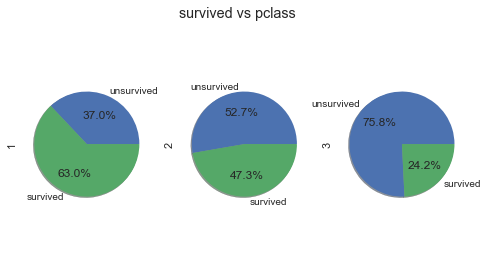

In [26]:
count_table = pd.crosstab(data['Survived'],data['Pclass'])

Axis = count_table.plot.pie(subplots = True,figsize = (8,4),labels = ['unsurvived','survived'],legend = False,autopct='%1.1f%%',shadow = True)
for ax in Axis:
    ax.set_aspect('equal')
plt.suptitle("survived vs pclass")


### It's clear that the higher class, the higher  survive rate. Class 1 have the highest rate of survive while class 3 have the lowest rate of survive. 

### second we think about the relation between age and survived

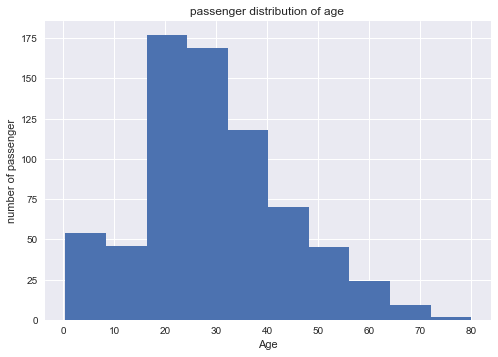

In [14]:
#single variable exploration for age distribution
plt.hist(data.Age.dropna(axis=0))
plt.title("passenger distribution of age ")
plt.xlabel("Age")
plt.ylabel("number of passenger")



#### By investigating the passenger distribution of age, we could separate age into four class,  'child',"Young_man",'medium_man','old_man'

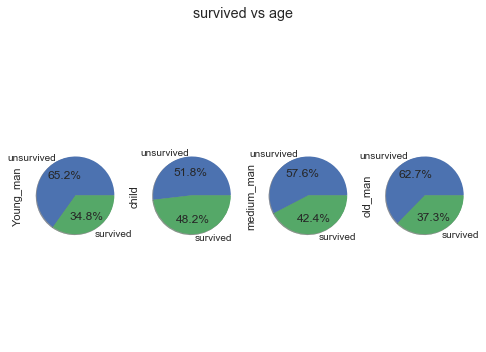

In [32]:
# get the data between survived and age
df_with_nan = pd.DataFrame({'Survived':data.Survived,"age":pd.qcut(data.Age,[0, .2, .5, .8, 1.], labels = ['child',"Young_man",'medium_man','old_man'])})

#cleaning missing data 
df2 = df_with_nan.dropna(axis=0)

#count data into age vs survival number
count_table = pd.crosstab(df2['Survived'],df2['age'])


#show survive percentage between different age class

Axis = count_table.plot.pie(subplots = True,labels = ['unsurvived','survived'],autopct='%1.1f%%',shadow = True,legend =False )
for ax in Axis:
     ax.set_aspect('equal')
plt.suptitle("survived vs age")


### we can see that child has the most probability to survive, while young man has smallest chance to survive. Next we will explore the relationship between sex and survive. 

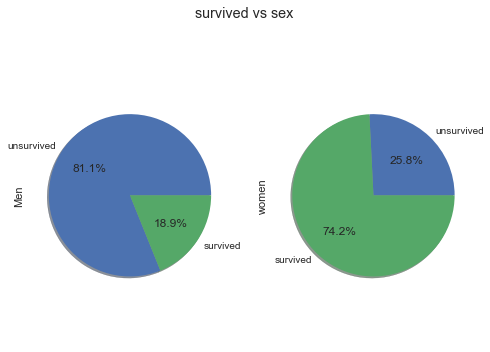

In [30]:

#count data into women and man vs survival number
count_table = pd.crosstab(data['Survived'],data['Sex'])

# plot survive percentage between women and men
Axis = df.plot.pie(subplots = True,legend = False,labels = ['unsurvived','survived'],autopct='%1.1f%%',shadow = True)
for ax in Axis:
    ax.set_aspect('equal')
plt.suptitle("survived vs sex")


### thus we can infer that there are many gentle man showing lady fisrt manner. women has a lot more probability to survive

## surmmary
 
## Higher class has more probabily to survive, also, child and women has more probabily to survive.However, there are some problems in our analysis. First, many variables such as Name, SibSp are not investigated,  thus we still not sure the effects for survival by these uninvestigated variables. Second, 177 of 891 passenger records missed the age values, which wakes our conclusion on age's effect on survival. Finally, we only use a sample to analysis, which may not represents the population. Further job may analyse  the coeffect for survival by all the variables using logistic regression. 